## What affects US airlines' stock price over time

One of the indicators of the company’s performance

What are some potential drivers for stock price

Whether or not we can predict a company’s performance based on those factors

Companies can try to mitigate some factors in order to avoid performance dips

In [51]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import sklearn.metrics       as Metrics
import pandas                as pd
import matplotlib.pyplot     as plt
import statsmodels.api       as sm
import statsmodels

from   scipy                   import stats
from   statsmodels.formula.api import ols
from   collections             import Counter
from   sklearn                 import preprocessing
from   datetime                import datetime
from   collections             import Counter
from   math                    import exp
from   sklearn.linear_model    import LinearRegression as LinReg
from   sklearn.metrics         import mean_absolute_error
from   sklearn.metrics         import median_absolute_error
from   sklearn.metrics         import r2_score
from   pandas.plotting         import register_matplotlib_converters 
from   pingouin                import pairwise_ttests
register_matplotlib_converters()

(736330.0, 736694.0)

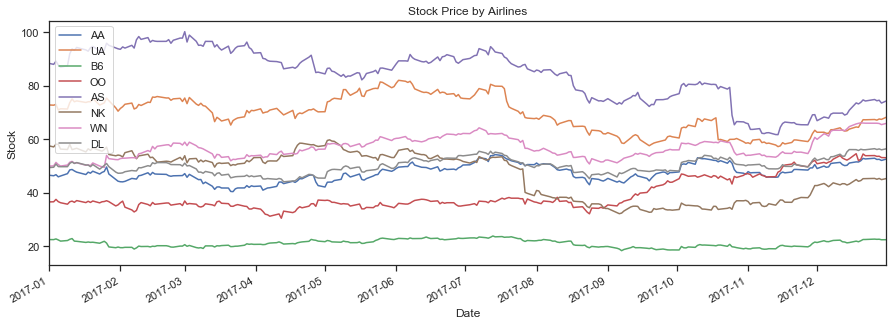

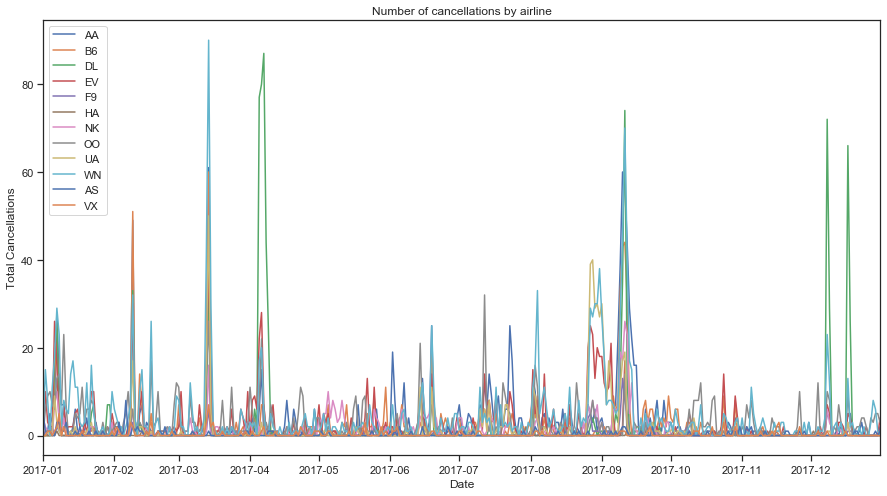

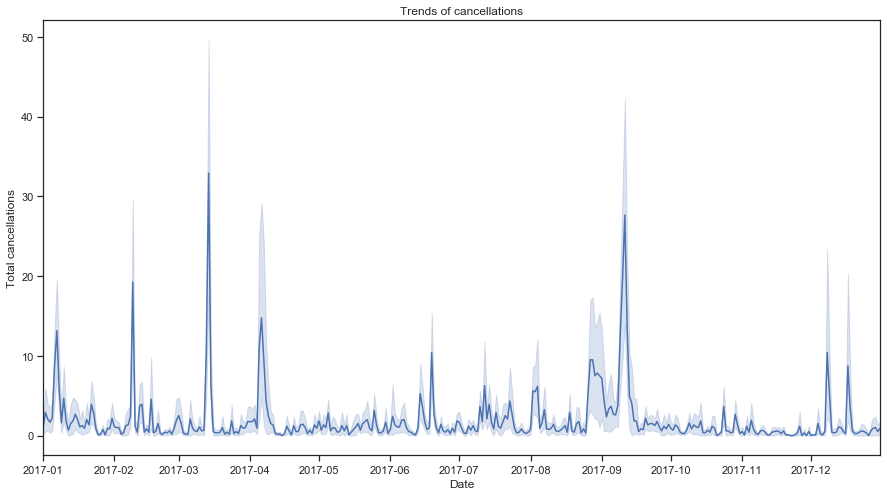

In [102]:
flight_traffic=pd.read_csv('flight_traffic.csv', sep=',',parse_dates=[[0,1,2]])

x = flight_traffic.groupby(['airline_id','year_month_day'])['cancelled'].sum()
x = pd.DataFrame(x)
x = x.reset_index()

stock_prices = pd.read_csv('stock_prices.csv', delimiter=',')
stock_prices_airlines = stock_prices.iloc[:,0:9]
stock_prices_airlines['timestamp'] = stock_prices_airlines['timestamp'].astype('datetime64[ns]') 
stock_price_date = stock_prices_airlines.set_index('timestamp')
stock_price_date.plot(figsize=(15, 5))
plt.ylabel("Stock")
plt.xlabel("Date")
plt.title("Stock Price by Airlines")
plt.xlim(('2017-01-01','2017-12-31'))
plt.legend()


plt.figure(figsize=(15, 8))
for name in flight_traffic.airline_id.unique():
    plt.plot(x[x.airline_id == name]['year_month_day'],x[x.airline_id == name]['cancelled'],
            label = name)
    plt.ylabel("Total Cancellations")
    plt.xlabel("Date")
    plt.title("Number of cancellations by airline")
    plt.xlim(('2017-01-01','2017-12-31'))
    plt.legend()

plt.figure(figsize=(15, 8))
sns.lineplot(x='year_month_day', y='cancelled', data = x)
plt.ylabel("Total cancellations")
plt.xlabel("Date")
plt.title("Trends of cancellations")
plt.xlim(('2017-01-01','2017-12-31'))




In [101]:
pairwise_results = pairwise_ttests(dv='distance', between = ['airline_id'], padjust='bonf', data=flight_traffic)
pairwise_results

C:\Users\Maral\Anaconda3\lib\site-packages\pingouin\bayesian.py:151: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)
C:\Users\Maral\Anaconda3\lib\site-packages\pingouin\bayesian.py:151: RuntimeWarning: overflow encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,airline_id,AA,B6,False,True,-5.870,48401.26,two-sided,4.375405e-09,2.887767e-07,bonf,2.276e+05,-0.041
1,airline_id,AA,DL,False,True,49.297,181573.17,two-sided,0.000000e+00,0.000000e+00,bonf,inf,0.231
2,airline_id,AA,EV,False,True,221.581,123762.28,two-sided,0.000000e+00,0.000000e+00,bonf,inf,0.987
3,airline_id,AA,F9,False,True,-14.412,15611.81,two-sided,8.715549e-47,5.752262e-45,bonf,1.271e+43,-0.114
4,airline_id,AA,HA,False,True,35.030,8439.42,two-sided,4.061155e-251,2.680362e-249,bonf,6.244e+262,0.601
5,airline_id,AA,NK,False,True,5.001,27174.41,two-sided,5.735900e-07,3.785694e-05,bonf,2612.607,0.035
6,airline_id,AA,OO,False,True,223.027,139218.34,two-sided,0.000000e+00,0.000000e+00,bonf,inf,1.044
7,airline_id,AA,UA,False,True,-43.244,113939.28,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.236
8,airline_id,AA,WN,False,True,110.607,150442.96,two-sided,0.000000e+00,0.000000e+00,bonf,inf,0.509
9,airline_id,AA,AS,False,True,-38.508,24432.51,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.344


## The observed difference is statistically significant and stock prices differ significantly across airlines

In [66]:
traffic = pd.read_csv('flight_traffic.csv', parse_dates=[[0,1,2]]).set_index('year_month_day')

In [67]:
stocks = pd.read_csv('updated_stocks.csv', parse_dates=[0]).set_index('Date')

In [68]:
airlines = pd.read_csv('airlines.csv')

## Plots for cancellations vs stock price (for each day in 2017) per airline

In [69]:
volume = traffic.groupby(['airline_id','year_month_day'])['origin_airport'].count()

volume.name = 'Traffic Volume'

volume = pd.DataFrame(volume)

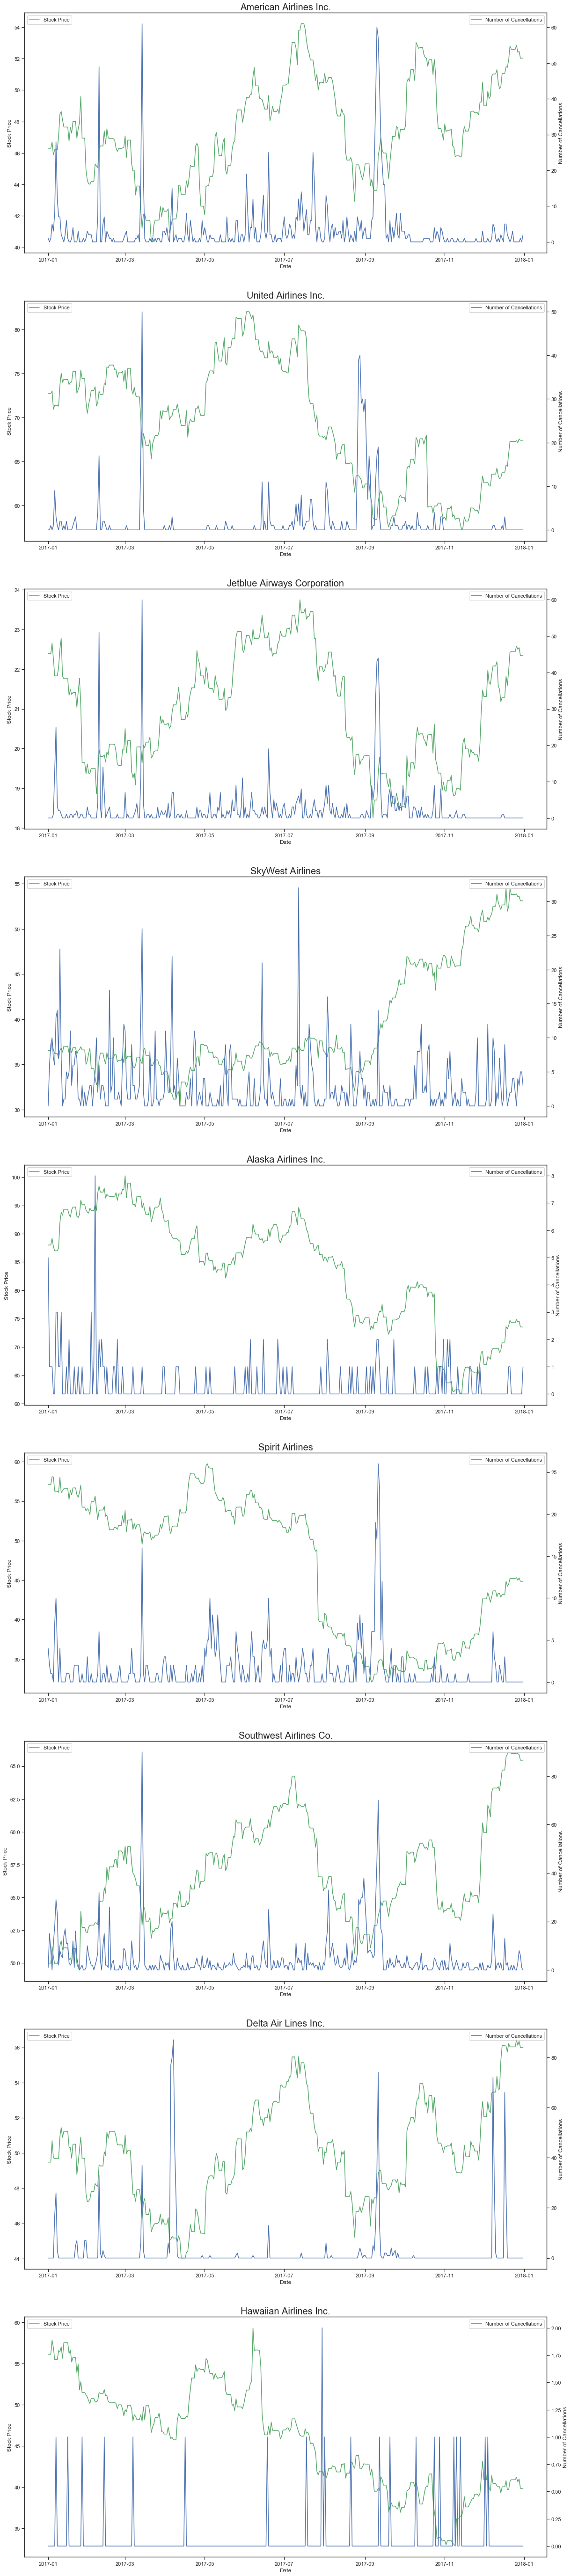

In [70]:
fig,axes=plt.subplots(9,1, figsize=(20,100))
vars_to_plot = stocks.columns
i = 0
for ax in axes:
    var = vars_to_plot[i]
    i+=1
    ax2 = ax.twinx()
    sns.lineplot(stocks[var].keys(),
             stocks[var].values,
             color='g',
             label='Stock Price',
             ax=ax,
             legend=False)
    ax.set_ylabel('Stock Price')
    sns.lineplot(traffic[traffic.airline_id == var].groupby('year_month_day')['cancelled'].sum().keys(),
                 traffic[traffic.airline_id == var].groupby('year_month_day')['cancelled'].sum().values,
                 ax=ax2,
                 color='b',
                 label='Number of Cancellations',
                 legend=False)
    ax2.set_ylabel('Number of Cancellations')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(airlines[airlines.airline_id == var]['airline_name'].values[0], fontsize=20)

    

### Hypothesis testing

In [71]:
def get_cancel(row, split_at=30):
    if row.cancelled >= split_at:
        return 1
    else:
        return 0

In [72]:
for i,var in enumerate(stocks.columns):
    aa_cancellations = pd.DataFrame(traffic[traffic.airline_id == var].groupby('year_month_day')['cancelled'].sum())
    aa = aa_cancellations.merge(pd.DataFrame(stocks[var]), left_index=True, right_index=True)
    aa['cancel_more_than'] = aa.apply(lambda row: get_cancel(row, 30), axis=1)
    statistic, pvalue = stats.ttest_ind(aa[aa.cancel_more_than == 1][var],
                                    aa[aa.cancel_more_than == 0][var],
                                    equal_var=False)
    print(airlines[airlines.airline_id == var]['airline_name'].values[0])
    print(pvalue)
    print('---')

American Airlines Inc.
0.013128164321607759
---
United Airlines Inc.
0.0006635810891153688
---
Jetblue Airways Corporation
0.000413211510474079
---
SkyWest Airlines
nan
---
Alaska Airlines Inc.
nan
---
Spirit Airlines
nan
---


C:\Users\Maral\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\Maral\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Maral\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Maral\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Maral\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Southwest Airlines Co.
2.8458562212096388e-05
---
Delta Air Lines Inc.
0.15962070599197148
---
Hawaiian Airlines Inc.
nan
---


## Weather vs Stock Price

In [73]:
weather = pd.read_csv('weather.csv', parse_dates=[5])

In [74]:
weather['datetime'] = weather.datetime.dt.date.astype('datetime64[ns]')

In [75]:
extreme = []
temp_mean = weather.temperature.mean()
temp_std = weather.temperature.std()
temp_range = (temp_mean - (3*temp_std), temp_mean + (3*temp_std))

visib_limit = 5000

wind_mean = weather.wind_speed.mean()
wind_std = weather.wind_speed.std()
wind_range = (wind_mean - (3*wind_std), wind_mean + (3*wind_std))

snow_mean = weather.snow_depth.mean()
snow_std = weather.snow_depth.std()
snow_limit = snow_mean + (3*snow_std)


In [76]:
extreme_index = weather[(~weather['temperature'].between(temp_range[0], temp_range[1])) |\
                        (weather['visibility'] <= 5000) |\
                        (~weather['wind_speed'].between(wind_range[0], wind_range[1])) |\
                        (weather['snow_depth'] >= snow_limit)].index

In [77]:
weather.loc[extreme_index,'extreme'] = 1

In [78]:
weather['extreme'] = weather['extreme'].fillna(0)

In [79]:
extreme_weather = weather.merge(traffic,
                                left_on=['airport_id','datetime'],
                                right_on=['origin_airport',traffic.index])[['datetime','airline_id','extreme','cancelled']]

In [80]:
x = extreme_weather.groupby(['airline_id','datetime']).sum().loc['AA']

In [81]:
from statsmodels.sandbox.regression.gmm import IV2SLS     

In [82]:
for var in stocks.columns:
    x = extreme_weather.groupby(['airline_id','datetime']).sum().loc[var]
    y = stats.linregress(x.extreme, x.cancelled)
    predict = (y.slope*x.extreme) + y.intercept
    print(airlines[airlines.airline_id == var]['airline_name'].values[0])
    print(y)
    print(stats.linregress(predict[5:], stocks[var].diff(5)[5:]))
    print('---')

American Airlines Inc.
LinregressResult(slope=0.14467678060968428, intercept=5.963777343013674, rvalue=0.19525875376291882, pvalue=0.000174165766983439, stderr=0.03814117847904701)
LinregressResult(slope=0.0014041981683729353, intercept=0.06910190046201917, rvalue=0.003269837240512793, pvalue=0.950702034904301, stderr=0.022696476017510382)
---
United Airlines Inc.
LinregressResult(slope=0.1221725800857118, intercept=3.151738769132651, rvalue=0.13460368770930373, pvalue=0.0100383541827057, stderr=0.04720555306284559)
LinregressResult(slope=0.10573610485583379, intercept=-0.6457010427718552, rvalue=0.11250143737736057, pvalue=0.032849343074057714, stderr=0.04935803284570969)
---
Jetblue Airways Corporation
LinregressResult(slope=0.33575302384644573, intercept=3.2974288739370996, rvalue=0.279365060374077, pvalue=5.718364908538955e-08, stderr=0.06056886447160776)
LinregressResult(slope=0.011739461708689527, intercept=-0.09040590872977304, rvalue=0.11796296566333526, pvalue=0.02520632090313

In [83]:
x = extreme_weather.groupby(['airline_id','datetime']).sum().loc['B6']
y = stats.linregress(x.extreme, x.cancelled)
predict = (y.slope*x.extreme) + y.intercept
print(airlines[airlines.airline_id == 'B6']['airline_name'].values[0])
print(y)
print(stats.linregress(predict[5:], stocks['B6'].diff(5)[5:])[3])

Jetblue Airways Corporation
LinregressResult(slope=0.33575302384644573, intercept=3.2974288739370996, rvalue=0.279365060374077, pvalue=5.718364908538955e-08, stderr=0.06056886447160776)
0.025206320903135314


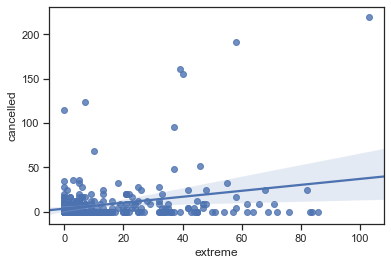

In [84]:
sns.regplot(x.extreme, x.cancelled)

In [85]:
extreme_weather = weather.merge(traffic[traffic.cancelled == 1],
                                left_on=['airport_id','datetime'],
                                right_on=['origin_airport',traffic[traffic.cancelled == 1].index])[['datetime','airline_id','extreme']]

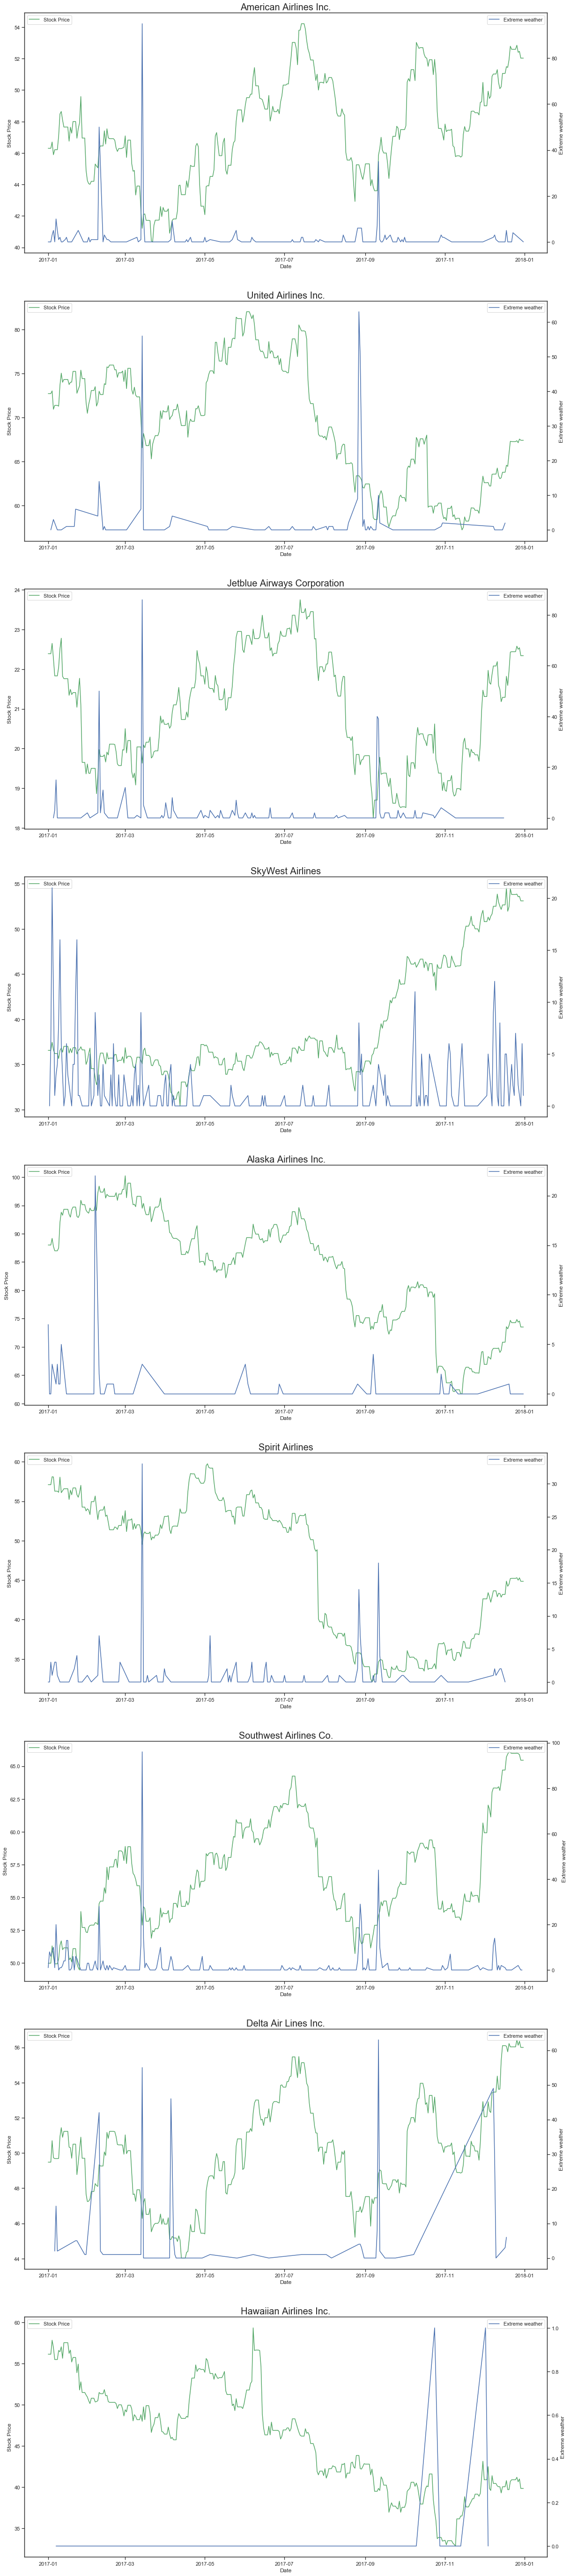

In [86]:
fig,axes=plt.subplots(9,1, figsize=(20,100))
vars_to_plot = stocks.columns
i = 0
for ax in axes:
    var = vars_to_plot[i]
    i+=1
    ax2 = ax.twinx()
    sns.lineplot(stocks[var].keys(),
             stocks[var].values,
             color='g',
             label='Stock Price',
             ax=ax,
             legend=False)
    ax.set_ylabel('Stock Price')
    sns.lineplot(extreme_weather[extreme_weather.airline_id == var].groupby('datetime')['extreme'].sum().keys(),
                 extreme_weather[extreme_weather.airline_id == var].groupby('datetime')['extreme'].sum().values,
                 ax=ax2,
                 color='b',
                 label='Extreme weather',
                 legend=False)
    ax2.set_ylabel('Extreme weather')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title(airlines[airlines.airline_id == var]['airline_name'].values[0], fontsize=20)

    

In [87]:
def get_extreme(row, split_at=30):
    if row.extreme >= split_at:
        return 1
    else:
        return 0

In [88]:
for i,var in enumerate(stocks.columns):
    aa_cancellations = pd.DataFrame(extreme_weather[extreme_weather.airline_id == var].groupby('datetime')['extreme'].sum())
    aa = aa_cancellations.merge(pd.DataFrame(stocks[var]), left_index=True, right_index=True)
    aa['cancel_more_than_30'] = aa.apply(lambda row: get_extreme(row, 10), axis=1)
    statistic, pvalue = stats.ttest_ind(aa[aa.cancel_more_than_30 == 1][var],
                                    aa[aa.cancel_more_than_30 == 0][var],
                                    equal_var=False)
    cor,p = stats.spearmanr(aa[var].diff()[1:],aa['extreme'][1:])
    print(airlines[airlines.airline_id == var]['airline_name'].values[0])
    print(pvalue)
    print(cor,p)
    print('---')

American Airlines Inc.
0.0405547308408874
0.1294862745402746 0.06763433667714314
---
United Airlines Inc.
0.049516195289969527
0.02694047665379752 0.7987870782942713
---
Jetblue Airways Corporation
0.015389499531518391
-0.015748466413469372 0.8413643792374267
---
SkyWest Airlines
0.5946086376795383
0.04528855646844049 0.5059388148660873
---
Alaska Airlines Inc.
nan
0.22638071898067735 0.05243969865232767
---
Spirit Airlines
0.21522601175640238
0.0936819880357975 0.2557871445442089
---
Southwest Airlines Co.
0.00923506772646253
0.1022737328916294 0.09290587731338606
---
Delta Air Lines Inc.
0.9385503539380817
0.005965455843504359 0.9655220178479134
---
Hawaiian Airlines Inc.
nan
0.08677626681257793 0.7160262582548298
---


## Fares vs Stock Price

In [89]:
fares = pd.read_csv('fares.csv', delimiter=',')

In [90]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,...,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,...,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,...,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,...,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,...,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,...,0,0,0,0,0,0,0,0,0,0


In [91]:
fares_no_NA = fares[fares.airline_id != "--"]
fares_no_NA = fares_no_NA.set_index('quarter')

In [92]:
fares_no_NA_describe = fares_no_NA.describe(include=[np.number])
fares_no_NA_describe

,distance,10,20,30,40,50,60,70,80,90,...,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
count,50460.000000,50460.000000,50460.000000,50460.000000,50460.000000,50460.000000,50460.000000,50460.000000,50460.000000,50460.000000,...,50460.000000,50460.000000,50460.000000,50460.000000,50460.000000,50460.000000,50460.000000,50460.000000,50460.000000,50460.000000
mean,1023.150654,37.173365,48.278716,55.051962,56.860741,56.312029,54.503310,52.395759,50.309017,47.444907,...,0.031015,0.039120,0.030559,0.030955,0.036346,0.037138,0.033948,0.028855,0.031015,2.599802
std,702.970294,178.400363,179.014086,166.814429,152.898229,137.782893,124.837061,113.678349,105.879804,96.849936,...,0.407535,0.766358,0.477954,0.465365,0.573833,0.758607,0.878483,0.511544,0.492647,11.957271
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,871.000000,3.000000,2.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1409.250000,17.000000,15.000000,24.000000,36.000000,46.000000,50.000000,53.000000,53.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5095.000000,8452.000000,4845.000000,3268.000000,2937.000000,2513.000000,2002.000000,1722.000000,2109.000000,1299.000000,...,27.000000,82.000000,48.000000,45.000000,62.000000,85.000000,156.000000,65.000000,52.000000,330.000000


In [93]:
fares_no_NA_describe = fares_no_NA_describe.iloc[1,1:251]

Text(0.5, 0, 'fares')

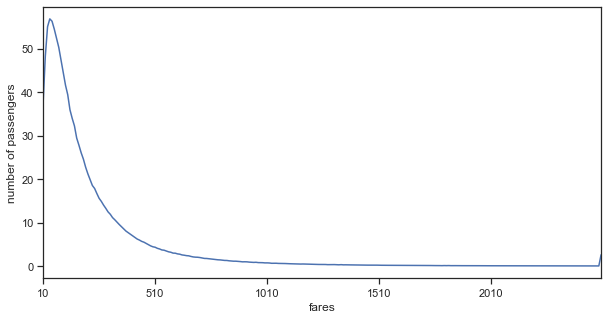

In [94]:
plt.figure()
plot = fares_no_NA_describe.plot(figsize=(10, 5))
plot.set_ylabel('number of passengers')
plot.set_xlabel('fares')

In [95]:
fares_AA = fares[fares.airline_id == 'AA']

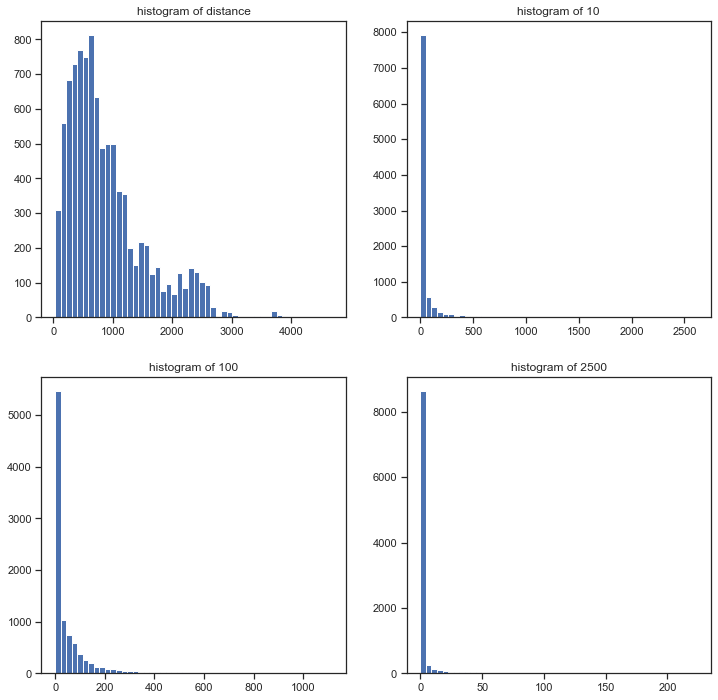

In [96]:
#AA airline
plt.figure(figsize=(12,12))
vars_to_plot = ['distance', '10', '100', '2500']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    plt.hist(fares_AA[var], 50)
    title_string = "histogram of " + var 
    plt.title(title_string)

    
#normal, skewed, multi-modal, etc. 
#extreme right-skewed 
#outliers? we can omit the number of passager more than 500 

In [97]:
fares_UA = fares[fares.airline_id == 'UA']
fares_B6 = fares[fares.airline_id == 'B6']
fares_OO = fares[fares.airline_id == 'OO']
fares_AS = fares[fares.airline_id == 'AS']
fares_NK = fares[fares.airline_id == 'NK']
fares_WN = fares[fares.airline_id == 'WN']
fares_DL = fares[fares.airline_id == 'DL']
fares_HA = fares[fares.airline_id == 'HA']

In [98]:
airline_fares = pd.concat([fares_AA, fares_UA, fares_B6, fares_OO, fares_AS, fares_NK, fares_WN, fares_DL, fares_HA])

In [99]:
airline_fares[['distance']].describe()

,distance
count,44297.000000
mean,1033.491275
std,718.731147
min,11.000000
25%,483.000000
50%,864.000000
75%,1440.000000
max,5095.000000


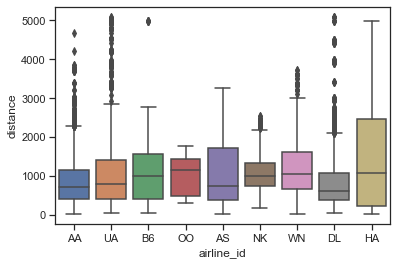

In [100]:
sns.boxplot(x = 'airline_id', y = 'distance', data = airline_fares)
plt.show()